In [1]:
import os

from mwc.models import init_db, get_all_movies_with_subtitles, Movie
from mwc.opensubitles import Subtitle
from mwc.cfg import DB_PATH

from srt import SRTParseError

init_db(DB_PATH)
movies = get_all_movies_with_subtitles()
len(movies)

570

In [ ]:
import re
from collections import defaultdict
    
TAG_RE = re.compile(r'(<[^>]+>).*?(</[^>]+>)')

tags = defaultdict(lambda: 0)

for m in movies:
    s = Subtitle.get_from_movie(m)
    try:
        for l in s.get_lines():
            matchs = [item for sublist in TAG_RE.findall(l.content) for item in sublist]
            for match in matchs:
                tags[match] += 1
    except SRTParseError as error:
        print(f"Removing srt file from movie \"{m.name}\" ({m.imdb_id}) due error: {m.srt_file}")
        os.remove(m.srt_file)
        m.subtitle_id = None
        m.srt_file = None
        m.save()


In [2]:
tags

NameError: name 'tags' is not defined

In [9]:
from mwc.helpers import get_stop_words
from mwc.wordcloud import WordCloud

stop_words = get_stop_words()
movies_ids = ['0072684', '0083658', '9877170', '2935510', '1772341']
movies = Movie.select().where(Movie.imdb_id << movies_ids)



Barry Lyndon


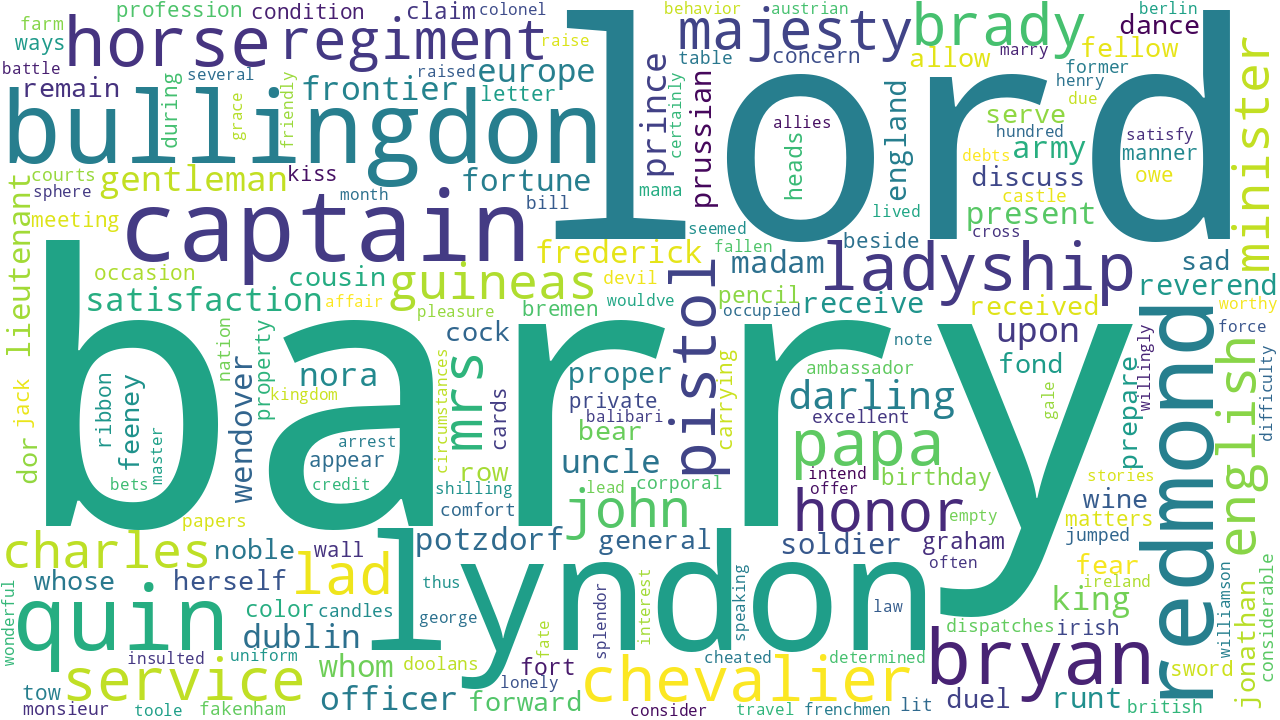

In [10]:
print(movies[0].name)
wc = WordCloud(movies[0], stop_words)
wc.cloud.to_image()

Blade Runner


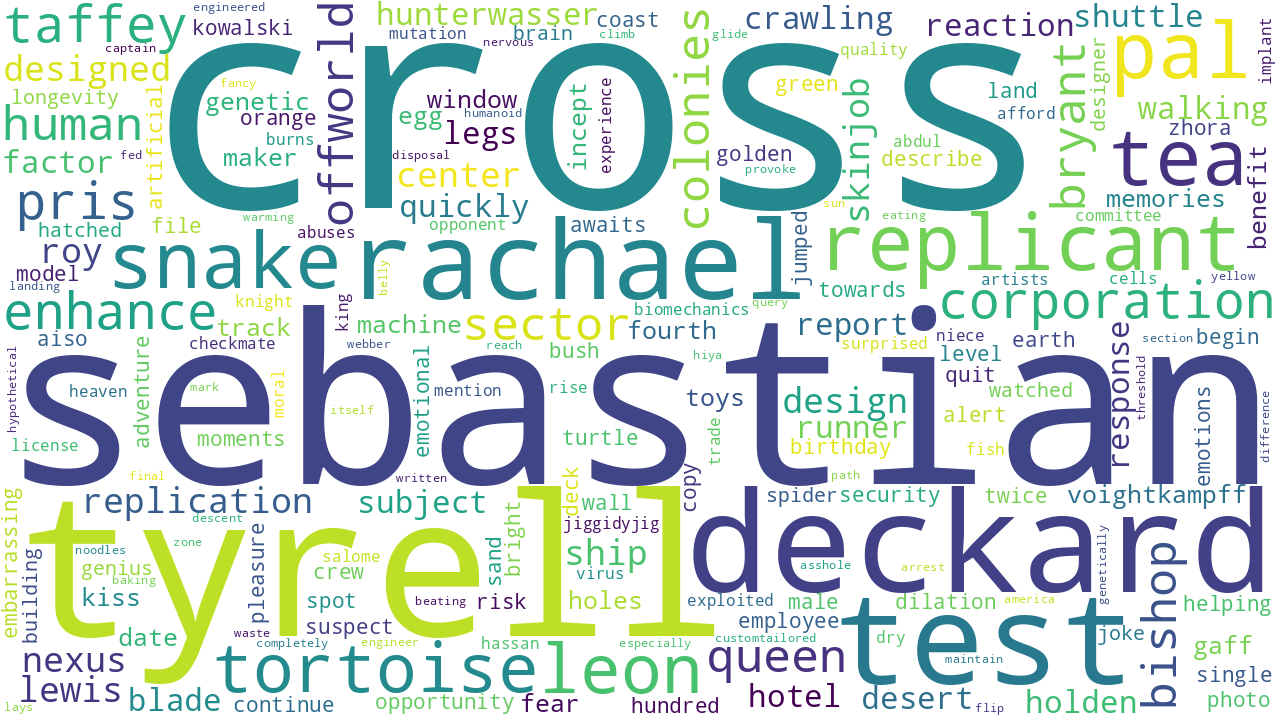

In [11]:
print(movies[1].name)
wc = WordCloud(movies[1], stop_words)
wc.cloud.to_image()

Wreck-It Ralph


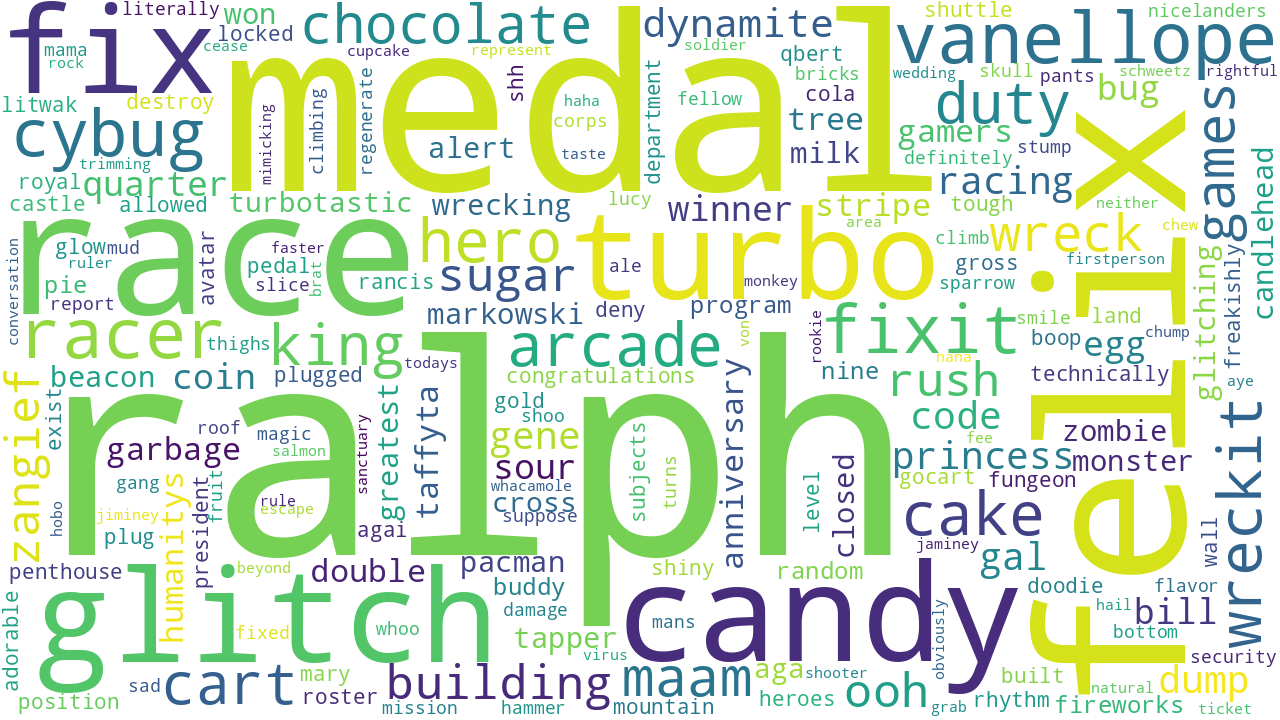

In [12]:
print(movies[2].name)
wc = WordCloud(movies[2], stop_words)
wc.cloud.to_image()

Ad Astra


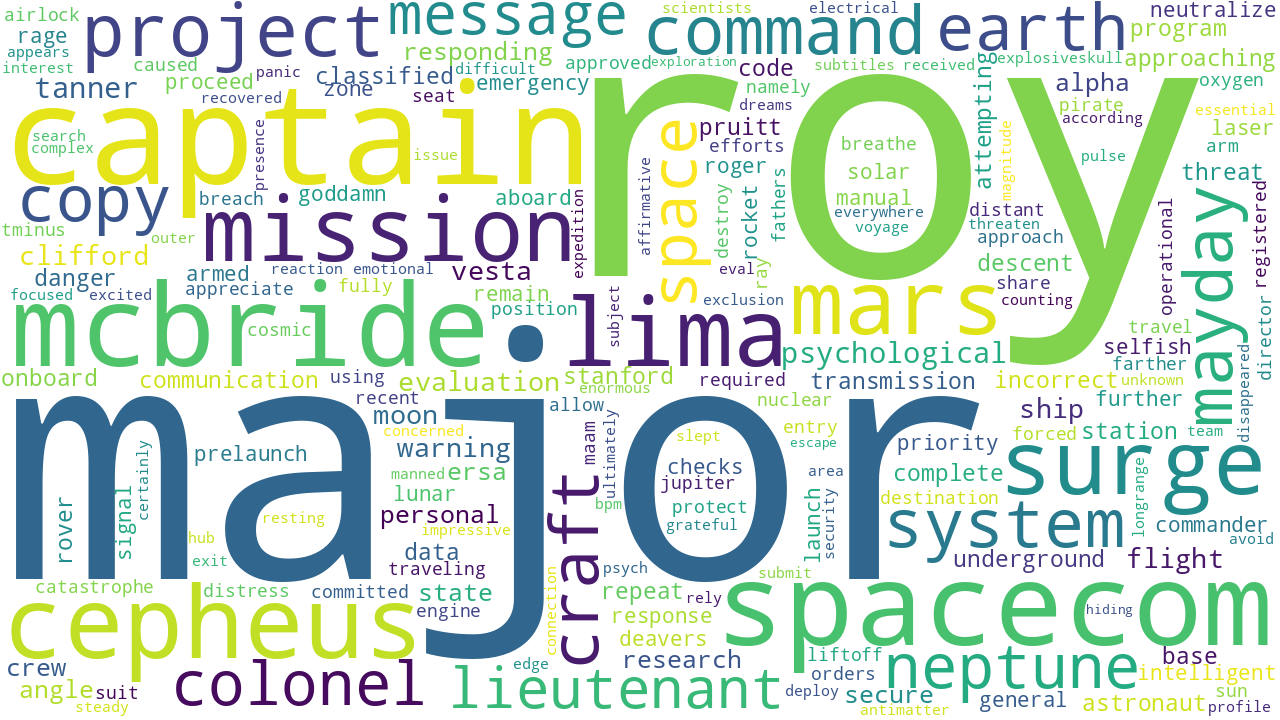

In [13]:
print(movies[3].name)
wc = WordCloud(movies[3], stop_words)
wc.cloud.to_image()

Malang


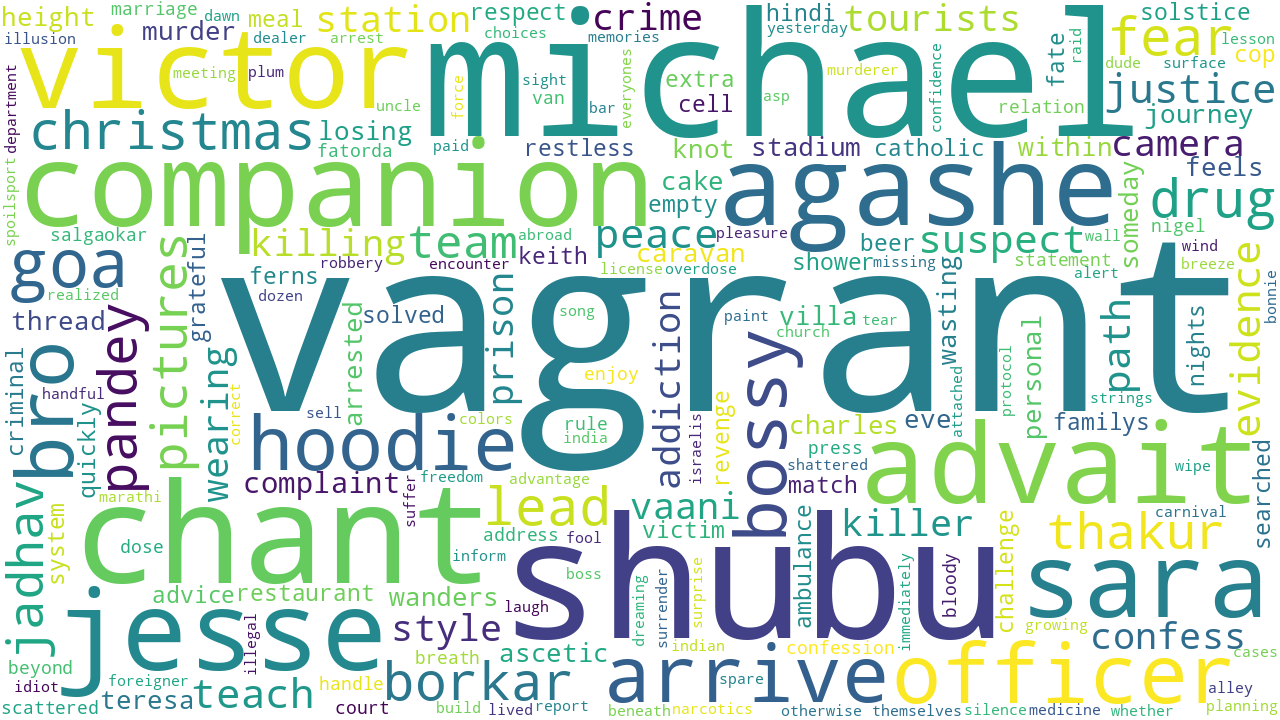

In [14]:
print(movies[4].name)
wc = WordCloud(movies[4], stop_words)
wc.cloud.to_image()